In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [16]:
#Mengimport File Dataset
df = pd.read_csv("dataR2.csv")

In [17]:
#Describing Data
df.describe()

,Age,Glucose,Insulin,Leptin,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,97.793103,10.012086,169.458526,1.551724
std,16.112766,22.525162,10.067768,183.238061,0.499475
min,24.000000,60.000000,2.432000,4.311000,1.000000
25%,45.000000,85.750000,4.359250,21.779500,1.000000
50%,56.000000,92.000000,5.924500,97.821000,2.000000
75%,71.000000,102.000000,11.189250,265.894750,2.000000
max,89.000000,201.000000,58.460000,834.821000,2.000000


In [18]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.5,70,2.707,467.408.667,88.071,97.024,799.585,417.114,1
1,83,2.069.049.454,92,3.115,706.897.333,88.438,5.429.285,406.405,468.786,1
2,82,2.312.467.037,91,4.498,1.009.651.067,179.393,2.243.204,927.715,554.697,1
3,68,2.136.752.137,77,3.226,612.724.933,98.827,716.956,12.766,928.22,1
4,86,2.111.111.111,92,3.549,8.053.864,66.994,481.924,1.057.635,773.92,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.85,92,3.330,755.688,54.680,12.1,10.96,268.23,2
112,62,26.84,100,4.530,11.174,12.450,21.42,7.32,330.16,2
113,65,32.05,97,5.730,1.370.998,61.480,22.54,10.33,314.05,2
114,72,25.59,82,2.820,570.392,24.960,33.75,3.27,392.46,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    object 
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    object 
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    object 
 7   Resistin        116 non-null    object 
 8   MCP.1           116 non-null    object 
 9   Classification  116 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 9.2+ KB


In [20]:
print(df.isnull().sum())

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


In [21]:
# Periksa duplikat
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Menghapus duplikat
df = df.drop_duplicates()


Number of duplicate rows: 0


In [22]:
print("DataFrame sesudah menghapus duplikat:")
print(df)

DataFrame sesudah menghapus duplikat:
     Age            BMI  Glucose  Insulin           HOMA   Leptin Adiponectin  \
0     48           23.5       70    2.707    467.408.667   88.071      97.024   
1     83  2.069.049.454       92    3.115    706.897.333   88.438   5.429.285   
2     82  2.312.467.037       91    4.498  1.009.651.067  179.393   2.243.204   
3     68  2.136.752.137       77    3.226    612.724.933   98.827     716.956   
4     86  2.111.111.111       92    3.549      8.053.864   66.994     481.924   
..   ...            ...      ...      ...            ...      ...         ...   
111   45          26.85       92    3.330        755.688   54.680        12.1   
112   62          26.84      100    4.530         11.174   12.450       21.42   
113   65          32.05       97    5.730      1.370.998   61.480       22.54   
114   72          25.59       82    2.820        570.392   24.960       33.75   
115   86          27.18      138   19.910      6.777.364   90.280      

In [23]:
# Kelompokkan data berdasarkan kolom kanker payudara
grouped_df = df.groupby("Leptin")

In [24]:
# Hitung jumlah data untuk setiap kelompok
data_count = grouped_df.size()

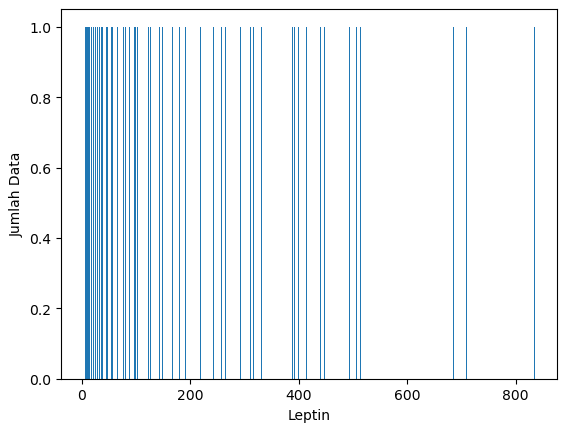

In [25]:
# Buat grafik batang
plt.bar(data_count.index, data_count)
plt.xlabel("Leptin")
plt.ylabel("Jumlah Data")
plt.show()

<AxesSubplot:xlabel='Leptin', ylabel='Classification'>

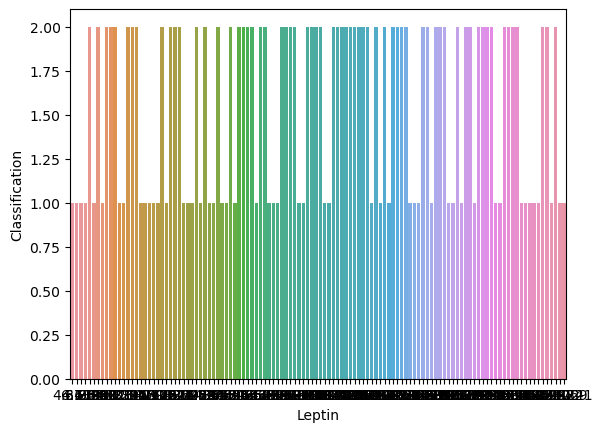

In [26]:
sns.barplot(x = 'Leptin', y = 'Classification', data = df)

<AxesSubplot:xlabel='Leptin', ylabel='Classification'>

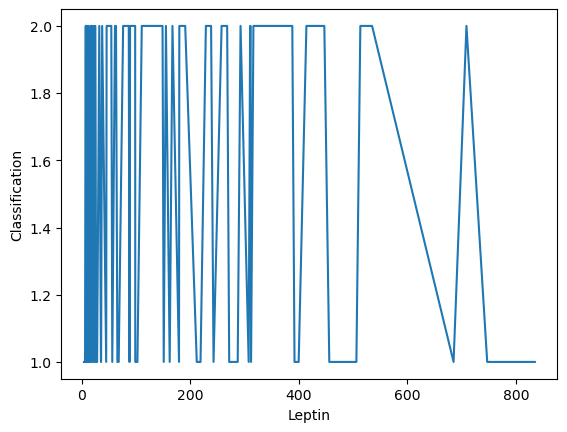

In [27]:
sns.lineplot(x = 'Leptin', y = 'Classification', data = df)

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [29]:
X = df.iloc[:,-1].values
y = df['Classification']

In [30]:
X

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

In [32]:
X.shape

(116,)

In [33]:
# Bagi data menjadi data pelatihan (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(92,)

In [35]:
X_train

array([1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2], dtype=int64)

In [36]:
X_test.shape

(24,)

In [37]:
X_test

array([2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [38]:
y_train.shape

(92,)

In [39]:
y_train

15     1
68     2
31     1
24     1
55     2
      ..
106    2
14     1
92     2
51     1
102    2
Name: Classification, Length: 92, dtype: int64

In [40]:
y_test.shape

(24,)

In [41]:
# Inisialisasi model Naive Bayes
naive_bayes_model = GaussianNB()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Data latih
x_train = [[1, 2], [3, 4], [5, 6], [7, 8]]
y_train = [2, 1, 1, 1,]


Akurasi: 1.0
[[7 0]
 [2 1]]
              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



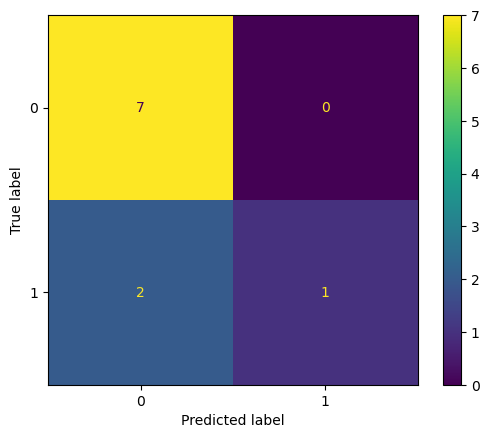

In [24]:
# Bagi data menjadi data pelatihan dan data pengujian
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
naive_bayes_model = GaussianNB()

# Latih model dengan data pelatihan
naive_bayes_model.fit(x_train, y_train)

#  Evaluasi model dengan data pengujian
accuracy = naive_bayes_model.score(x_test, y_test)
print(f'Akurasi: {accuracy}')


from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
y_test = [2, 1, 1, 1, 1, 1, 2, 1, 2, 1]
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 2, 1]

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Akurasi: 0.8333333333333334
[[9 0]
 [2 1]]
              precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       1.00      0.33      0.50         3

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12



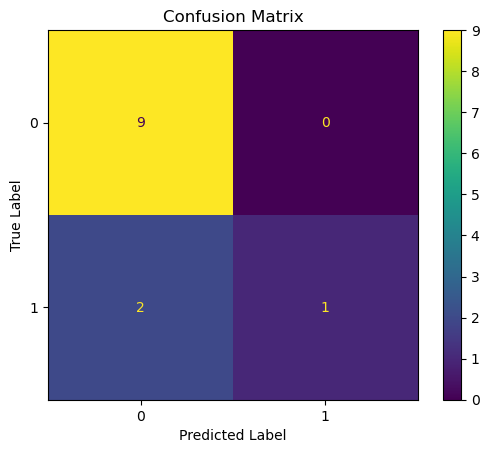

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Data latih
x_train = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11]]
y_train = [2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1]

# Data uji 
x_test = [[2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11]]
y_test = [2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1]

# Inisialisasi model Naive Bayes
naive_bayes_model = GaussianNB()

# Latih model dengan data pelatihan
naive_bayes_model.fit(x_train, y_train)

# Evaluasi model dengan data pengujian
accuracy = naive_bayes_model.score(x_test, y_test)
print(f'Akurasi: {accuracy}')

# Prediksi label dengan data uji
y_pred = naive_bayes_model.predict(x_test)

# Confusion Matrix dan Classification Report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

# Menampilkan Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       1.00      0.33      0.50         3

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12



Akurasi pada data uji: 0.8
Confusion Matrix:
[[2 1]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



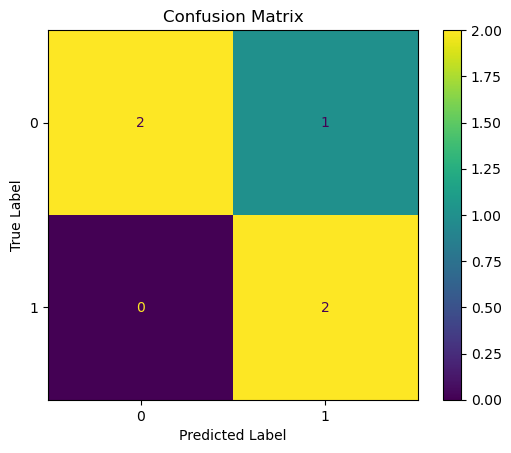

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Data latih
x_train = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y_train = [2, 1, 1, 1, 2]

# Data uji 
x_test = [[2, 3], [4, 5], [6, 7], [8, 9], [10, 11]]
y_test = [2, 1, 1, 1, 2]

# Inisialisasi model Naive Bayes
naive_bayes_model = GaussianNB()

# Latih model dengan data pelatihan
naive_bayes_model.fit(x_train, y_train)

# Evaluasi model dengan data pengujian
test_accuracy = naive_bayes_model.score(x_test, y_test)
print(f'Akurasi pada data uji: {test_accuracy}')

# Prediksi label dengan data uji
y_pred = naive_bayes_model.predict(x_test)

# Confusion Matrix dan Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
